## [Tensorflow] AutoMPG 데이터를 활용한 기본적인 Regression Prediction (자동차 연비 예측하기)

In [53]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [55]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [56]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
USA             0
Europe          0
Japan           0
dtype: int64

### [2] 전처리 - (1) : 결측치 제거

In [57]:
dataset01 = dataset.dropna()

### [2] 전처리 - (2) : 결측치 대체

In [58]:
dataset02 = dataset

In [59]:
dataset02['Horsepower'][32] = (dataset02[dataset02['Displacement'] == dataset02.iloc[32]['Displacement']]['Horsepower'].mean())
dataset02['Horsepower'][126] = (dataset02[dataset02['Displacement'] == dataset02.iloc[126]['Displacement']]['Horsepower'].mean())
dataset02['Horsepower'][330] = (dataset02[dataset02['Displacement'] == dataset02.iloc[330]['Displacement']]['Horsepower'].mean())
dataset02['Horsepower'][336] = (dataset02[dataset02['Displacement'] == dataset02.iloc[336]['Displacement']]['Horsepower'].mean())
dataset02['Horsepower'][374] = (dataset02[dataset02['Displacement'] == dataset02.iloc[374]['Displacement']]['Horsepower'].mean())

dataset02['Horsepower'][354]= dataset02[dataset02['Acceleration']== dataset02.iloc[354]['Acceleration']]['Horsepower'].mean()

C:\Users\LJH\AppData\Local\Temp\ipykernel_8920\1307225542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset02['Horsepower'][32] = (dataset02[dataset02['Displacement'] == dataset02.iloc[32]['Displacement']]['Horsepower'].mean())
C:\Users\LJH\AppData\Local\Temp\ipykernel_8920\1307225542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset02['Horsepower'][126] = (dataset02[dataset02['Displacement'] == dataset02.iloc[126]['Displacement']]['Horsepower'].mean())
C:\Users\LJH\AppData\Local\Temp\ipykernel_8920\1307225542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [60]:
dataset02.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [61]:
input01 = dataset01.iloc[:, 1:]
target01 = dataset01['MPG']

input02 = dataset02.iloc[:, 1:]
target02 = dataset02['MPG']

In [62]:
from sklearn.model_selection import train_test_split

# 데이터 나누기
train_input01, test_input01, train_target01, test_target01 = train_test_split(
    input01, target01
)

# 데이터 나누기
train_input02, test_input02, train_target02, test_target02 = train_test_split(
    input02, target02
)

In [63]:
model01 = keras.Sequential()
model01.add(layers.Dense(64, activation = 'relu', input_shape = [len(train_input01.keys())]))
model01.add(layers.Dense(64, activation = 'relu'))
model01.add(layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model01.compile(loss = 'mse',
optimizer= optimizer,
metrics = ['mae', 'mse'])

In [64]:
model02 = keras.Sequential()
model02.add(layers.Dense(64, activation = 'relu', input_shape = [len(train_input01.keys())]))
model02.add(layers.Dense(64, activation = 'relu'))
model02.add(layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model02.compile(loss = 'mse',
optimizer= optimizer,
metrics = ['mae', 'mse'])

In [65]:
list_epochs = [10, 50, 100, 150, 300]
list_mae_01 = []
list_mse_01 = []

for i in range(0, len(list_epochs)):
    model01.fit(train_input01, train_target01, epochs = list_epochs[i])
    model01_evaluate = model01.evaluate(test_input01, test_target01)
    list_mae_01.append(model01_evaluate[1])
    list_mse_01.append(model01_evaluate[2])

Epoch 1/10
10/10 [==============================] - 1s 1ms/step - loss: 6752.6079 - mae: 42.6045 - mse: 6752.6079
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 342.9858 - mae: 15.1962 - mse: 342.9858
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 2511.0994 - mae: 38.7245 - mse: 2511.0994
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 2261.1113 - mae: 41.5049 - mse: 2261.1113
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 983.1356 - mae: 27.2652 - mse: 983.1356
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 2587.0625 - mae: 45.5120 - mse: 2587.0625
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 826.6658 - mae: 22.2750 - mse: 826.6658
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 1903.0378 - mae: 36.7488 - mse: 1903.0378
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 1754.3574 - mae: 37.43

In [66]:
list_mae_02 = []
list_mse_02 = []

for i in range(0, len(list_epochs)):
    model02.fit(train_input02, train_target02, epochs = list_epochs[i])
    model02_evaluate = model02.evaluate(test_input01, test_target01)
    list_mae_02.append(model02_evaluate[1])
    list_mse_02.append(model02_evaluate[2])

Epoch 1/10
10/10 [==============================] - 1s 1ms/step - loss: 4976.9199 - mae: 43.9611 - mse: 4976.9199
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1155.7150 - mae: 26.5005 - mse: 1155.7150
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 1790.4197 - mae: 37.7349 - mse: 1790.4197
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 1118.2568 - mae: 29.1680 - mse: 1118.2568
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 2352.6863 - mae: 44.2078 - mse: 2352.6863
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 1045.5536 - mae: 27.9764 - mse: 1045.5536
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1864.5361 - mae: 39.6058 - mse: 1864.5361
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 1646.6006 - mae: 36.4782 - mse: 1646.6006
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 1050.5115 - mae:

In [67]:
df = pd.DataFrame([list_mae_01, list_mse_01, list_mae_02, list_mse_02]).T
df.columns = ['결측치 제거 평균절대오차', '결측치 제거 평균제곱오차', '결측치 대체 평균절대오차', '결측치 대체 평균제곱오차']
df.index = list_epochs
df

,결측치 제거 평균절대오차,결측치 제거 평균제곱오차,결측치 대체 평균절대오차,결측치 대체 평균제곱오차
10,15.563350,374.754181,17.194162,457.856079
50,10.186387,151.262955,33.624817,1383.388062
100,19.361912,450.830719,7.004018,63.097088
150,5.869442,41.198360,10.223634,127.770584
300,2.695745,10.508278,3.435345,15.966363


In [68]:
import	platform

# 시스템별 한글 폰트 설정
if	platform.system()	==	'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system()	==	'Darwin':	#	MacOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='AppleGothic')

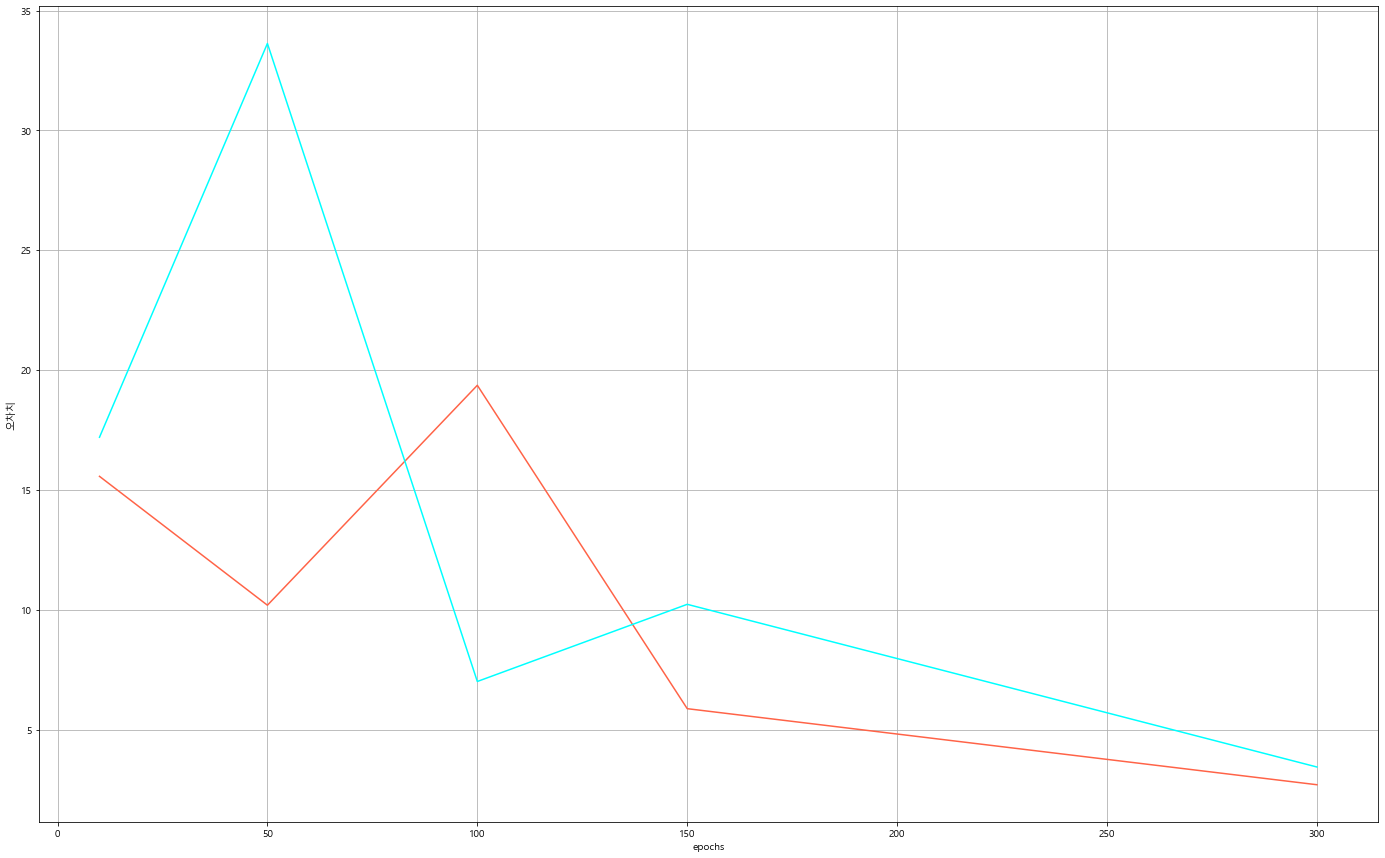

In [69]:
plt.figure(figsize=(24,15))
plt.plot(df['결측치 제거 평균절대오차'], color = 'tomato')
plt.plot(df['결측치 대체 평균절대오차'], color = 'cyan')
plt.xlabel('epochs')
plt.ylabel('오차치')
plt.grid(True)